# Modelling and Simulating Social Systems - <font size=4 color='gray'>Leonel Aguilar 2018</font>
# <font color='gray'>Lecture 5 - 1D Cellular Automata</font>

___

### Import Libraries

In [239]:
import numpy as np #matrix and vector library
import matplotlib.pyplot as plt #plotting library

### Define plots to be inlined

In [241]:
#Jupyter magic that makes plots to be inlined in the notebook
%matplotlib inline 

### Create cell 
- possible neighborhood configurations ($2$ states $[0,1]$ and $3$ cells $[(L)eft,(C)enter,(R)ight)]$), $2^3=8$ neighborhood configuarations 
- possible rules ($2$ states $[0,1]$ and $8$ neighborhood configurations) $2^8 = 256$ possible rules, also called elementary cellular automata

In [242]:
x_dim=50 #Dimension of the 1D cells space
cells = np.zeros([x_dim,1]) #creating empty cells
cells[int(x_dim*0.8)]=1 #Adding seed
cells[int(x_dim*0.2)]=1 #Adding another seed

In [243]:
## Create a function to plot each automata generation

In [253]:
def PlotAutomataHistory(cellHistory):
    """Function that plots a cellular automata evolution history. 
    It plots the generations in the y-axis and the cells in the x axis
    Input: Matrix of cells and their evolution on each generation
    Output: Plot 
    """
    fig, ax = plt.subplots(1, 1, figsize=(16, 16)) #Determine the number of subplots in the figure and its size
    ax.imshow(cellHistory.transpose(), interpolation='none') #Type of plot 
    #Axis labels
    ax.set_xlabel('Cell')
    ax.set_ylabel('Generation')
    
    
    #Major ticks frequency
    mTickNum=10
    xNum=int(cellHistory.shape[0]/mTickNum)
    yNum=int(cellHistory.shape[1]/mTickNum)+1
         
    #Major ticks
    ax.set_xticks(np.arange(0, cellHistory.shape[0], xNum))
    ax.set_yticks(np.arange(0, cellHistory.shape[1], yNum))
    
    #Major tick labels
    ax.set_xticklabels(np.arange(0, cellHistory.shape[0]+1, xNum))
    ax.set_yticklabels(np.arange(0, cellHistory.shape[1]+1, yNum))
    
    # Minor ticks
    ax.set_xticks(np.arange(-.5, cellHistory.shape[0], 1), minor=True);
    ax.set_yticks(np.arange(-.5, cellHistory.shape[1], 1), minor=True)
    

    
    #Add grid
    #Gray line separates cells
    ax.grid(which='minor', axis='x', color='gray', linestyle='-', linewidth=2)
    #Red line separates generations
    ax.grid(which='minor', axis='y', color='red', linestyle='-', linewidth=2)
    #ax.set_axis_off()

### Plot initial state

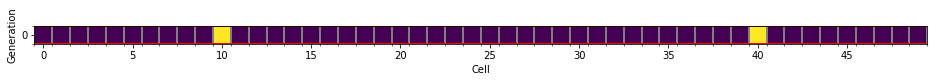

In [254]:
PlotAutomataHistory(cells)

### Determine the rule

In [255]:
#Enumarate the possible neighborhoods |(L)eft,(C)enter,(R)ight|
for i in reversed(range(0,8)):
    print("{0:03b}".format(i), end='|')

111|110|101|100|011|010|001|000|

In [256]:
#The 256 rules are named after the binary representation of the rule name in decimal
print("{0:08b}".format(110)) #i.e. 111 -> 0, 110 -> 1, 101 ->1, ..., 000->0

01101110


### Define a function that applies the rule

In [257]:
def apply_rule(L,C,R):
    """Defines the value of C in the next generation based on the values of L, C, R
    Input: Values of L,C,R
    Output: Value of C in the next generation"""
    rval=0
    if L == 1 and C == 1 and R ==1:
        rval= 0
    if L == 1 and C == 1 and R ==0:
        rval= 1
    if L == 1 and C == 0 and R ==1:
        rval= 1
    if L == 1 and C == 0 and R ==0:
        rval= 0
    if L == 0 and C == 1 and R ==1:
        rval= 1
    if L == 0 and C == 1 and R ==0:
        rval= 1
    if L == 0 and C == 0 and R ==1:
        rval= 1
    if L == 0 and C == 0 and R ==0:
        rval= 0
    return rval

### Define the step Function


In [258]:
def step(state):
    """Every timestep the state of the new generation of cells is determined by 
    the previous generation neighborhood
    Input: current state of all cells (state)
    Output: next state of all cells (new_state) 
    """
    new_state = np.zeros([x_dim,1])
    #Iterate through all cells (C) in the automata and extract its neighbourhood
    for i in range(x_dim):
        #Handle boundary conditions
        lc=i-1 if i>0 else 0
        rc=i+1 if i<x_dim-1 else i
        new_state[i] = apply_rule(state[lc],state[i],state[rc])
    return new_state

### Define the simulation

In [259]:
def simulation(X,max_steps):
    """Traces the whole evolution of an initial state X through max_steps generations
    Input: X, initial state
    Output: cells_stack.transpose(), matrix stacking the cells state after each timestep 
    """
    cells_stack=X.transpose()
    new_state=X
    #Move one step forward max_step times
    for i in range(max_steps):
        #Moves one step forward
        new_state=step(new_state)
        #Stores the result
        cells_stack=np.concatenate((cells_stack,new_state.transpose()))
    return cells_stack.transpose()
    

# Performing the simulation
___

In [260]:
max_steps=100 #Number of timesteps
results=simulation(cells,max_steps) #Perform simulation and store its results

## Plot results

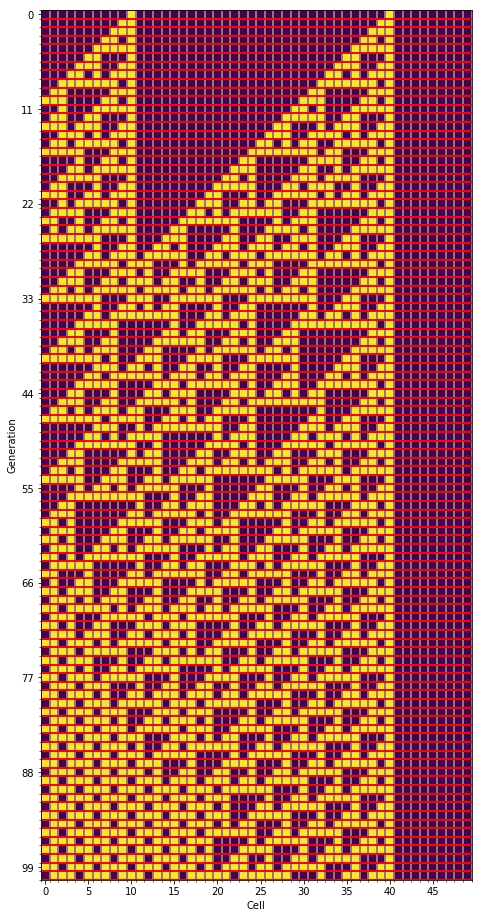

In [261]:
PlotAutomataHistory(results)

## To play around
* What are the effect of different rules?
    - Can you make the rule application function more generic?
    - Can you make the rule application function have better performance? (think binary)
* Can you make the rules non deterministic?
* ...